Интеграл =  0.19002885251166834
21
Интеграл посчитан c точностью: 6.357840420800898e-09 , что выше, чем заданная точность 1e-08


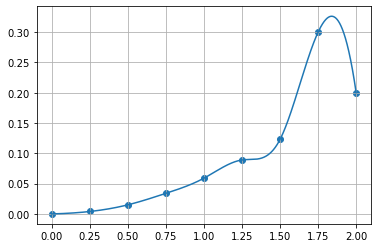

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import CubicSpline
from array import *
import math as math

Func = list()

with open("text.txt") as r_file: #Читаем аргументы и значения функции
    file_reader = csv.reader(r_file, delimiter = '\t')
    for row in file_reader:
        Func.append(row)
        
FuncArr = np.zeros((len(Func), len(Func[0])))
for i in range(0, len(FuncArr)):
    for j in range(len(FuncArr[0])):
        FuncArr[i][j] = float(Func[i][j]) #Заполняем массив аргументов и значений функции
xx = FuncArr[:,0] #Столбец аргументов
yy = FuncArr[:,1] #Столбец значений функции

cs = CubicSpline(xx,yy)

e = 0.00000001   #Заданная точность
a = 0.   #Нижняя граница интегрирования
b = 2.   #Верхняя граница интегрирования

def Sympson(a,b,h):
 
    x = np.arange(0.,2.+h, h).tolist()
    k = 0
    fx = []  #Создаем массив значений функции f(x)

    css = cs(x)

    for i in x:
        zn = css[k]
        k += 1
        fx.append(zn) #Заполняем список fx значениями функции
    
    Ih1_s1 = 0  #Вспомогательная переменная, элемент формулы Симпсона
    Ih1_s2 = 0  #Вспомогательная переменная, элемент формулы Симпсона
    
    for i in range(0,k):
        
        if i%2 != 0:
            Ih1_s1 += fx[i] #Ссумируем значения функции f(x) в точках с четным номером
        if i%2 == 0:
            Ih1_s2 += fx[i] #Ссумируем значения функции f(x) в точках с нечетным номером
            
    Ih = h/3.*(fx[0]+fx[k-1]+4*(Ih1_s1)+2*(Ih1_s2))  #Считаем интеграл с шагом h
    
    return Ih,x

h = 0.1 #Начальный шаг интегрирования
Ihprev = 0  #Переменная для записи значения с предыдущим шагом
count = 0 #Счетчик итераций
Ih,x = Sympson(a,b,h)

while(abs(Ih - Ihprev) > e): #Условия окончания расчётов по правилу Рунге
    h = h/2
    Ihprev = Ih
    Ih,x = Sympson(a,b,h)
    count+=1

print("Интеграл = ",Ih)
print(count)
Ih_pogreshnost = abs(Ih-Ihprev)  #Оценка точности проведенных вычислений методом Ругне Кутты
 
if Ih_pogreshnost < e:
    print('Интеграл посчитан c точностью:', Ih_pogreshnost, ', что выше, чем заданная точность', e)

plt.plot(x,cs(x))
plt.scatter(xx,yy)
plt.grid()
#plt.scatter(x,cs(x))
plt.show()

